# Gaussian processes and Bayesian optimization

In this assignment you will learn how to use <a href="http://sheffieldml.github.io/GPy/">GPy</a> and <a href="http://sheffieldml.github.io/GPyOpt/">GPyOpt</a> libraries to deal with gaussian processes. These libraries provide quite simple and inuitive interfaces for training and inference, and we will try to get familiar with them in a few tasks.

### Installation
New libraries that are required for this tasks can be installed with the following command (if you use Anaconda):

```bash
pip install GPy 
pip install gpyopt 
pip install xgboost 
```

You can also follow installtaion guides from <a href="https://github.com/SheffieldML/GPy">GPy</a> and <a href="http://sheffieldml.github.io/GPyOpt/firststeps/index.html">GPyOpt</a> if you want to build them from source

You will also need following libraries: ```numpy```, ```scikit-learn```, ```matplotlib```

In [83]:
! conda update scikit-learn --yes

Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment /opt/conda:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mkl-2017.0.3               |                0       129.5 MB
    numpy-1.13.1               |           py35_0         7.2 MB
    numexpr-2.6.2              |      np113py35_0         357 KB
    scipy-0.19.1               |      np113py35_0        36.3 MB
    scikit-learn-0.19.0        |      np113py35_0        11.7 MB
    ------------------------------------------------------------
                                           Total:       185.1 MB

The following packages will be UPDATED:

    mkl:          11.3.3-0                                       --> 2017.0.3-0        
    numexpr:      2.5.2-np110py35_1                              --> 2.6.2-np113py35_0 
    numpy:        1.10.4-py35_blas_openblas_2

In [2]:
! conda install pyqt=4 --yes

Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment /opt/conda:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jpeg-8d                    |                2         806 KB
    qt-4.8.7                   |                4        32.7 MB
    pyqt-4.11.4                |           py35_4         3.3 MB
    ------------------------------------------------------------
                                           Total:        36.8 MB

The following NEW packages will be INSTALLED:

    pyqt: 4.11.4-py35_4
    qt:   4.8.7-4      

The following packages will be UPDATED:

    jpeg: 8d-1          --> 8d-2

Fetching packages ...
jpeg-8d-2.tar. 100% |################################| Time: 0:00:00  21.89 MB/s
qt-4.8.7-4.tar 100% |################################| Time: 0:00:01  25.16 MB/s
pyqt-4.11.4-py 100% |################

In [3]:
! pip install GPy

    100% |████████████████████████████████| 860kB 806kB/s 
    100% |████████████████████████████████| 71kB 3.7MB/s 
  Running setup.py bdist_wheel for GPy ... - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /home/jovyan/.cache/pip/wheels/36/b9/13/498e283b6081c81aded82d1c174f8c251096027be686e79005
  Running setup.py bdist_wheel for paramz ... - \ | done
  Stored in directory: /home/jovyan/.cache/pip/wheels/5b/d6/3d/3ba4e455d8dfb30effec982d8a48668d1f2b16deb539554656
Successfully built GPy paramz
You are using pip version 8.1.2, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
! pip install gpyopt

    100% |████████████████████████████████| 61kB 4.4MB/s 
  Running setup.py bdist_wheel for gpyopt ... - \ | done
  Stored in directory: /home/jovyan/.cache/pip/wheels/33/1d/87/dc02440831ba986b1547dd11a7dcd44e893b0527083066d869
Successfully built gpyopt
You are using pip version 8.1.2, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
! pip install xgboost

    100% |████████████████████████████████| 18.4MB 46kB/s 
You are using pip version 8.1.2, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [84]:
import numpy as np
import GPy
import GPyOpt
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.cross_validation import cross_val_score
import time
from grader import Grader
%matplotlib inline

### Grading
We will create a grader instace below and use it to collect your answers. Note that these outputs will be stored locally inside grader and will be uploaded to platform only after running submiting function in the last part of this assignment. If you want to make partial submission, you can run that cell any time you want.

In [7]:
grader = Grader()

## Gaussian processes: GPy (<a href="http://pythonhosted.org/GPy/">documentation</a>)

We will start with a simple regression problem, for which we will try to fit a Gaussian Process with RBF kernel.

In [8]:
def generate_points(n=25, noise_variance=0.0036):
    np.random.seed(777)
    X = np.random.uniform(-3.,3.,(n,1))
    y = np.sin(X) + np.random.randn(n,1)*noise_variance**0.5
    return X, y
    
def generate_noise(n=25, noise_variance=0.0036):
    np.random.seed(777)
    X = np.random.uniform(-3.,3.,(n,1))
    y = np.random.randn(n,1)*noise_variance**0.5
    return X, y

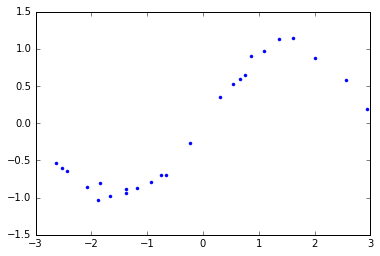

In [9]:
# Create data points
X, y = generate_points()
plt.plot(X, y, '.')
plt.show()

To fit a Gaussian Process, you will need to define a kernel. For Gaussian (GBF) kernel you can use *GPy.kern.RBF*
function.

<b> Task 1.1: </b> Create RBF kernel with variance 1.5 and length-scale parameter 2 for 1D samples and compute value of the kernel between 6-th and 10-th points (one-based indexing system). Submit a single number. 
<br><b>Hint:</b> use ```.K``` property of kernel object.

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.5  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |        
Current answer for task 1.1 is: 1.04618135454


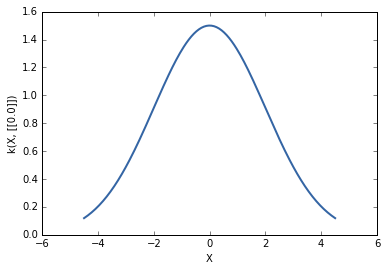

In [10]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.5, lengthscale=2.)
print(kernel)
kernel.plot(ax=plt.gca())
kernel_59 = kernel.K(X[5:6], X[9:10])[0,0] ### YOUR CODE HERE
grader.submit_GPy_1(kernel_59)

<b> Task 1.2: </b> Fit GP into generated data. Use kernel from previous task. Submit predicted mean and vairance at position $x=1$.
<br><b>Hint:</b> use ```GPy.models.GPRegression``` class.

In [12]:
model = GPy.models.GPRegression(X, y, kernel)
res = model.predict(np.array([[1]]))
print('Res:',res)
mean     = res[0][0][0]
variance = res[1][0][0]
grader.submit_GPy_2(mean, variance)

Res: (array([[ 0.66467749]]), array([[ 1.10014782]]))
Current answer for task 1.2 (mean) is: 0.66467749261
Current answer for task 1.2 (variance) is: 1.10014782238


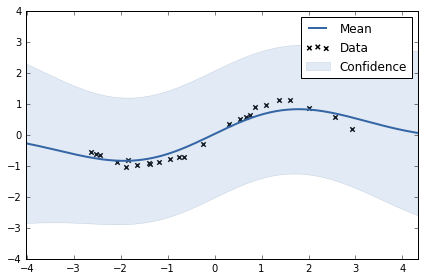

In [13]:
model.plot()
plt.show()

We see that model didn't fit the data quite well. Let's try to fit kernel and noise parameters automatically as discussed in the lecture! You can see current parameters below:

In [14]:
model

<b> Task 1.3: </b> Optimize length-scale, variance and noise component of the model and submit optimal length-scale value of the kernel. 
<br><b>Hint:</b> Use ```.optimize()``` function of the model and ```.lengthscale``` property of the kernel.

In [25]:
### YOUR CODE HERE
model.optimize_restarts(num_restarts = 3)
print(model)
lengthscale = kernel.lengthscale
grader.submit_GPy_3(lengthscale)

Optimization restart 1/3, f = -18.351767754167422
Optimization restart 2/3, f = -18.351767754151357
Optimization restart 3/3, f = -18.351767754161955

Name : GP regression
Objective : -18.351767754167422
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |             value  |  constraints  |  priors
  rbf.variance             |     0.70993854891  |      +ve      |        
  rbf.lengthscale          |     1.62526817262  |      +ve      |        
  Gaussian_noise.variance  |  0.00389787079379  |      +ve      |        
Current answer for task 1.3 is: 1.6252681726171339


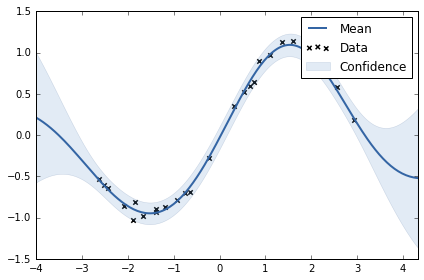

In [18]:
model.plot()
plt.show()

As you see, process generates outputs just right. Let's see if GP can figure out itself when we try to fit it into  noise or signal.

<b> Task 1.4: </b> Generate two datasets: sinusoid wihout noise and samples from gaussian noise. Optimize kernel parameters and submit optimal values of noise component.
<br><b>Note:</b> generate data only using ```generate_points(n, noise_variance)``` and ```generate_noise(n, noise_variance)``` function!

Optimization restart 1/3, f = 68.75241597935548
Optimization restart 2/3, f = 67.99804116643664
Optimization restart 3/3, f = 67.99804116870081


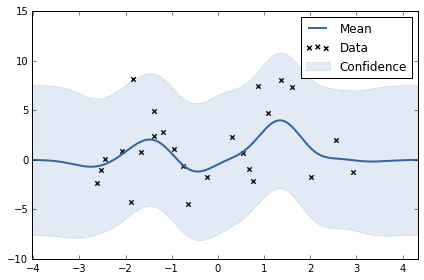

In [33]:
X, y = generate_noise(noise_variance=10)
model = GPy.models.GPRegression(X,y,kernel)
model.optimize_restarts(num_restarts=3)
noise = model.Gaussian_noise[0]
model.plot()

Optimization restart 1/3, f = -140.28957421093793
Optimization restart 2/3, f = -140.28948276777575
Optimization restart 3/3, f = -140.28958605526424


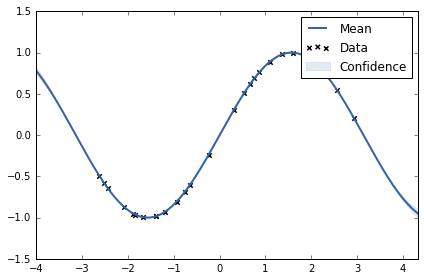

In [34]:
X, y = generate_points(noise_variance=0)
model = GPy.models.GPRegression(X,y,kernel)
model.optimize_restarts(num_restarts=3)
just_signal = model.Gaussian_noise[0]
model.plot()

In [35]:
grader.submit_GPy_4(noise, just_signal)

Current answer for task 1.4 (noise) is: 10.1433869469
Current answer for task 1.4 (just signal) is: 3.34565749779e-17


#### Sparce GP
Now let's consider the speed of GP. We will generate a dataset of 3000 points and measure time that is consumed for prediction of mean and variance for each point. We will then try to use indusing inputs and find optimal number of points according to quality-time tradeoff.

For sparse model with inducing points you should use ```GPy.models.SparseGPRegression``` class. You can set number of inducing inputs with parameter ```num_inducing``` and optimize their positions and values with ```.optimize()``` call.

<b>Task 1.5</b>: Create a dataset of 1000 points and fit GPRegression. Measure time for predicting mean and variance at position $x=1$. Then fit SparseGPRegression with 10 inducing inputs and repeat the experiment. Report speedup as a ratio between consumed time without and with inducing inputs.

In [38]:
X, y = generate_points(1000)

In [39]:
model = GPy.models.GPRegression(X, y, kernel)

start = time.time()
model.optimize(messages=True)
time_gp = time.time()-start

The installed widget Javascript is the wrong version.


<class 'float'>
Time for full training : 0.00412 ms


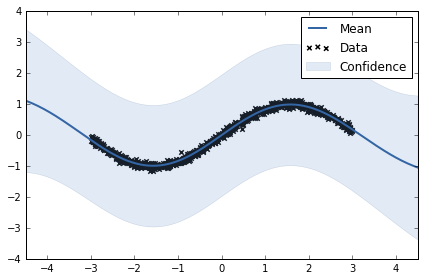

Time for GP training : 0.00890 ms


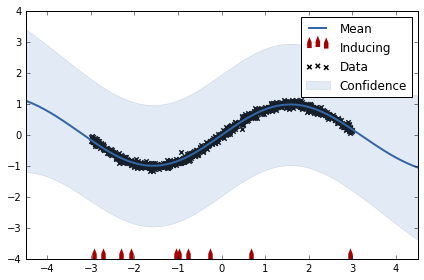

In [68]:
def f_get_time_for_one(m):
    start = time.time()
    res = m.predict(np.array([[1]]))
    return time.time()-start

X, y = generate_points(1000)
model = GPy.models.GPRegression(X, y, kernel)
time_gp=f_get_time_for_one(model)
print(type(time_sgp))
print("Time for full training : %2.5f ms"% time_gp)
model.plot()
plt.show()

model_ind = GPy.models.SparseGPRegression(X, y, kernel, num_inducing=10)
time_sgp=f_get_time_for_one(model_ind)
print("Time for GP training : %2.5f ms"% time_sgp)
model_ind.plot()
plt.show()


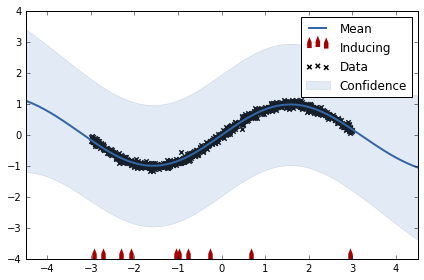

In [69]:
model_ind.plot()
plt.show()

In [71]:
grader.submit_GPy_5(time_sgp / time_gp)

Current answer for task 1.5 is: 2.159821841739935


## Bayesian optimization: GPyOpt (<a href="http://pythonhosted.org/GPyOpt/">documentation</a>, <a href="http://nbviewer.jupyter.org/github/SheffieldML/GPyOpt/blob/master/manual/index.ipynb">tutorials</a>)

In this part of the assignment we will try to find optimal hyperparameters to XGBoost model! We will use data from a small competition to speed things up, but keep in mind that the approach works even for large datasets.

We will use diabetes dataset provided in sklearn package.

In [85]:
dataset = sklearn.datasets.load_diabetes()
X = dataset['data']
y = dataset['target']

We will use cross validation score to estimate accuracy and our goal will be to tune: ```max_depth```, ```learning_rate```, ```n_estimators``` parameters. The baseline MSE with default XGBoost parameters is $0.2$. Let's see if we can do better. First we have to define optimization function and domains.

In [90]:
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
                XGBRegressor(learning_rate=parameters[0],
                              max_depth=int(parameters[2]),
                              n_estimators=int(parameters[3]),
                              gamma=int(parameters[1]),
                              min_child_weight = parameters[4]), 
                X, y, scoring='mean_squared_error').mean()
    score = np.array(score)
    return score

In [91]:
baseline = -cross_val_score(XGBRegressor(), X, y, scoring='mean_squared_error').mean()
baseline

3498.9517012046531

In [92]:
# Bounds (NOTE: define continuous variables first, then discrete!)
bounds = [
            {'name': 'learning_rate', 'type': 'continuous', 'domain': (0, 1)},
            {'name': 'gamma', 'type': 'continuous', 'domain': (0, 5)},
            {'name': 'max_depth', 'type': 'discrete', 'domain': (1, 50)},
            {'name': 'n_estimators', 'type': 'discrete', 'domain': (1, 300)},
            {'name': 'min_child_weight', 'type': 'discrete', 'domain': (1, 10)}
         ]

In [93]:
np.random.seed(777)
optimizer = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds,
                                                acquisition_type ='MPI',
                                                acquisition_par = 0.1,
                                                exact_eval=True)

In [94]:
max_iter = 50
max_time = 60
optimizer.run_optimization(max_iter, max_time)

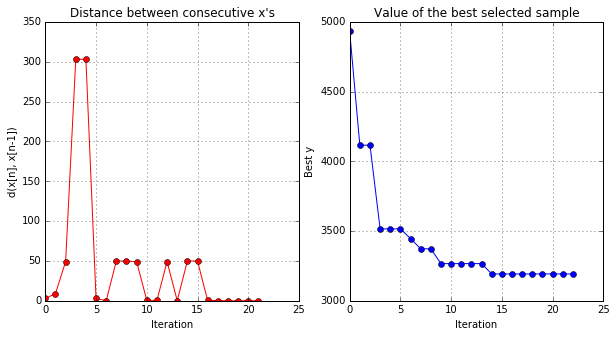

In [95]:
optimizer.plot_convergence()

Best values of parameters:

In [106]:
params = optimizer.X[np.argmin(optimizer.Y)];
print(params)

[  8.82407940e-02   1.89936399e+00   1.00000000e+00   3.00000000e+02
   1.00000000e+00]


In [112]:
for i in range(5):
    print ("%s : %2.4F"%(bounds[i]['name'],params[i]))

learning_rate : 0.0882
gamma : 1.8994
max_depth : 1.0000
n_estimators : 300.0000
min_child_weight : 1.0000


In [113]:
print('MSE:', np.min(optimizer.Y), 'Gain:', baseline/np.min(optimizer.Y)*100)

MSE: 3192.46099143 Gain: 109.600452773


We were able to get 9% boost wihtout tuning parameters by hand! Let's see if you can do the same. 

<b>Task 2.1:</b> Tune SVR model. Find optimal values for three parameters: ```C```, ```epsilon``` and ```gamma```. Use range (1e-5, 1000) for ```C```, (1e-5, 10) for ```epsilon``` and ```gamma```. Use MPI as acquisition function with weight 0.1. Submit optimal value of epsilon that was found by a model.

Base line :  6067.652264
Start Optimizer
Done


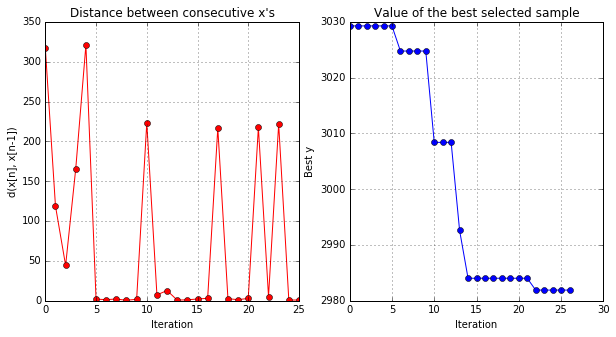

C : 777.1145
epsilon : 0.0000
gamma : 1.0780
MSE: 2981.91850763 Gain: 2.03481491814
Current answer for task 2.1 is: 10


In [141]:
### YOUR CODE HERE
def f_svr(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
                SVR(C=parameters[0],epsilon=parameters[1],gamma=parameters[2]), 
                X, y, scoring='mean_squared_error').mean()
    score = np.array(score)
    return score

baseline = -cross_val_score(SVR(), X, y, scoring='mean_squared_error').mean()
print('Base line : ',baseline)

bounds_svr = [
            {'name': 'C'      , 'type': 'continuous', 'domain': (1e-5, 1000) },
            {'name': 'epsilon', 'type': 'continuous', 'domain': (1e-5, 10)   },
            {'name': 'gamma'  , 'type': 'continuous', 'domain': (1e-5, 10)   },
         ]
optimizer = GPyOpt.methods.BayesianOptimization(f=f_svr, domain=bounds_svr,
                                                acquisition_type ='MPI',
                                                acquisition_par = 0.1,
                                                exact_eval=True)
max_iter = 50
max_time = 60
print('Start Optimizer')
optimizer.run_optimization(max_iter, max_time)
params = optimizer.X[np.argmin(optimizer.Y)];

print('Done')

optimizer.plot_convergence()

for i in range(3):
    print ("%s : %2.4F"%(bounds_svr[i]['name'],params[i]))
    
best_epsilon = params[1]
gain = baseline/np.min(optimizer.Y);
print('MSE:', np.min(optimizer.Y), 'Gain:', gain)
best_epsilon=10; 
grader.submit_GPyOpt_1(best_epsilon)

IndexError: index 1 is out of bounds for axis 0 with size 1

<b>Task 2.2:</b> For the model above submit boost in improvement that you got after tuning hyperparameters (output percents) [e.g. if baseline MSE was 40 and you got 20, output number 200]

In [136]:
performance_boost = gain### YOUR CODE HERE
grader.submit_GPyOpt_2(performance_boost*100)

Current answer for task 2.2 is: 202.623457004


### Authorization & Submission
To submit assignment parts to Cousera platform, please, enter your e-mail and token into variables below. You can generate token on this programming assignment page. <b>Note:</b> Token expires 30 minutes after generation.

In [142]:
STUDENT_EMAIL ="const.vin@gmail.com" # EMAIL HERE
STUDENT_TOKEN = "Ap9mptpCoTeZPMWs"# TOKEN HERE
grader.status()

You want to submit these numbers:
Task 1.1: 1.04618135454
Task 1.2 (mean): 0.66467749261
Task 1.2 (variance): 1.10014782238
Task 1.3: 1.6252681726171339
Task 1.4 (noise): 10.1433869469
Task 1.4 (just signal): 3.34565749779e-17
Task 1.5: 2.159821841739935
Task 2.1: 10
Task 2.2: 202.623457004


If you want to submit these answers, run cell below

In [143]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
